In [1]:
#***********************************************************************************************#
# Implementación del circuito de Codificación Superdensa en la plataforma Qiskit de IBM.
#***********************************************************************************************#

#***********************************************************************************************#
# Para esta implementación se ha tenido en cuenta la descripción del circuito dada en el siguiente 
# tutorial del libro de Qiskit:
# https://qiskit.org/textbook/ch-algorithms/superdense-coding.html

# Además se han tomando instrucciones e ideas del tutorial de la comunidad de desarrolladores de Qiskit disponible en:
# https://github.com/Qiskit/qiskit-community-tutorials/blob/master/terra/qis_intro/teleportation_superdensecoding.ipynb
#***********************************************************************************************#

#***********************************************************************************************#
# Curso de Computación Cuántica
# Prof. Gustavo Patino
# Departamento de Ingeniería Electrónica y Telecomunicaciones
# Facultad de Ingeniería
# Universidad de Antioquia
# Medellin, 2020-2022.
#***********************************************************************************************#

In [2]:
# Importing everything
from qiskit import *
from qiskit.visualization import plot_histogram

In [3]:
# Descomente la siguiente linea si desea ver las imágenes más grandes.
# %config InlineBackend.figure_format = 'svg' # Makes the images look nice

In [4]:
#Función para crear el estado de Bell OO.
def crear_estado_bell00(qc, a, b):
    qc.h(a) # Apply a h-gate to the first qubit
    qc.cx(a,b) # Apply a CNOT, using the first qubit as the control

In [5]:
# Define a function that takes a QuantumCircuit (qc)
# a qubit index (qubit) and a message string (msg)
def Alice_codificar_mensaje(qc, qubit, msg):
    if msg == "00":
        pass    # To send 00 we do nothing
    elif msg == "10":
        qc.x(qubit) # To send 10 we apply an X-gate
    elif msg == "01":
        qc.z(qubit) # To send 01 we apply a Z-gate
    elif msg == "11":
        qc.z(qubit) # To send 11, we apply a Z-gate
        qc.x(qubit) # followed by an X-gate
    else:
        print("Mensaje invalido: Se enviará '00'")

In [6]:
def Bob_decodificar_mensaje(qc, a, b):
    qc.cx(a,b)
    qc.h(a)

In [7]:
# Create the quantum register with 2 qubits (One for Alice, one for Bob.)
qr = QuantumRegister(2)

# Create the quantum circuit for the Superdense Coding Protocol
Circuito_cod_superdensa = QuantumCircuit(qr)

crear_estado_bell00(Circuito_cod_superdensa, qr[0], qr[1])

Circuito_cod_superdensa.barrier() # This adds a barrier to our circuit. A barrier 
             # separates the gates in our diagram and makes it 
             # clear which part of the circuit is which

# At this point, qubit 0 goes to Alice and qubit 1 goes to Bob

# Next, Alice encodes her message onto qubit 0. In this case,
# we want to send the message '11'. You can try changing this
# value and see how it affects the circuit

mensaje_de_alice = "10"

Alice_codificar_mensaje(Circuito_cod_superdensa, qr[0], mensaje_de_alice)
Circuito_cod_superdensa.barrier()
# Alice then sends her qubit to Bob.

# After recieving qubit 0, Bob applies the recovery protocol:
Bob_decodificar_mensaje(Circuito_cod_superdensa, qr[0], qr[1])

# Finally, Bob measures his qubits to read Alice's message
Circuito_cod_superdensa.measure_all()

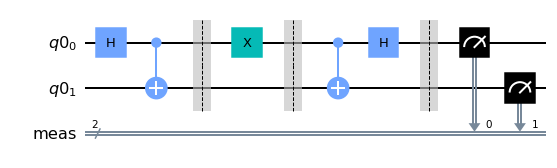

In [8]:
# Draw our output
Circuito_cod_superdensa.draw(output = "mpl")

{'10': 8192}


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


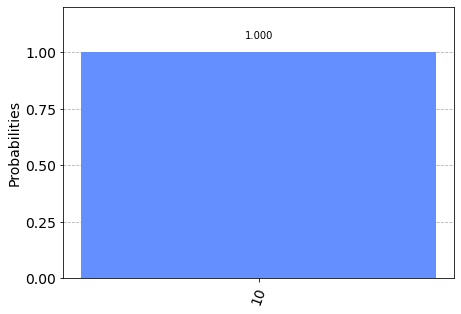

In [9]:
num_ejecuciones = 8192

backend = Aer.get_backend('qasm_simulator')
job_sim = execute(Circuito_cod_superdensa, backend, shots=num_ejecuciones)
sim_result = job_sim.result()

measurement_result = sim_result.get_counts(Circuito_cod_superdensa)
print(measurement_result)
plot_histogram(measurement_result)

In [10]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

In [11]:
# Load local account information
IBMQ.load_account()
# Get the least busy backend
#provider = IBMQ.get_provider(hub='ibm-q')
provider = IBMQ.get_provider(hub='ibm-q-education', group='uni-antioquia-1', project='qcudea2022-1')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-education', group='uni-antioquia-1', project='qcudea2022-1')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q-education', group='uni-antioquia-1', project='qcudea2022-1')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q-education', group='uni-antioquia-1', project='qcudea2022-1')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q-education', group='uni-antioquia-1', project='qcudea2022-1')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q-education', group='uni-antioquia-1', project='qcudea2022-1')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q-education', group='uni-antioquia-1', project='qcudea2022-1')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q-education', group='uni-antioquia-1', project='qcudea2022-1')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q-education', group='uni-antioquia-1', project='qcudea2022-1')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub=

In [12]:
remote_backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("El computador cuántico menos ocupado es el " + remote_backend.name())

El computador cuántico menos ocupado es el ibm_perth


In [13]:
# Run our circuit
job = execute(Circuito_cod_superdensa, remote_backend, shots=num_ejecuciones)

# Monitoring our job
job_monitor(job)

Job Status: job has successfully run


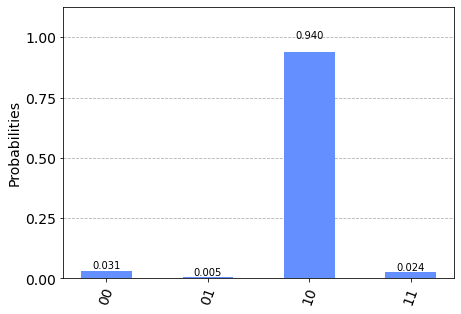

In [14]:
# Plotting our result
result = job.result()
result_count=result.get_counts(Circuito_cod_superdensa)
plot_histogram(result_count)

In [15]:
resultados_correctos = result_count[mensaje_de_alice]
print(resultados_correctos)
precision = (resultados_correctos/num_ejecuciones)*100
print("El mensaje recibido será el correcto con un margen porcentual del = %.2f%%" % precision)

7699
El mensaje recibido será el correcto con un margen porcentual del = 93.98%


In [16]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright